# Lecture 5 - Classification & Regression I (KNN)

K-Nearest Neighbor (KNN) is a intuitive classification and regression model: the predicted class label or predicted output value of and unknown data point $x$ depends on the labels/values of the $k$ data points most similar to $x$. This naturally assumes that there as a well-defined notion of distance or similarity between data points.

Compared to most other classification of regression models, there is not any real training involved -- KNN only "remembers" all the training data -- and all the heavy lifting (i.e., finding the k-nearest neighbors) is done during prediction. In practice, that is often a bit of a problem since training is usually a one-time process but prediction are very frequent one.

KNN is also an unparameterized model as it does not learn any parameters that would describe the trained model. All information needed for making predictions is in the training data. Note that $k$ is a hyperparameter to be specified by the user and not a trainable parameter.


Let's get started...


## Setting up the notebook

Specify how plots get rendered

In [55]:
%matplotlib notebook

Make all required imports. Many of the stuff is for fancy visualization.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

from scipy.spatial import Voronoi, voronoi_plot_2d

from matplotlib.patches import Rectangle, Circle
from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report, f1_score, mean_squared_error

## Working with Toy Data

Understand KNN is easiest to visualize and understand with very simple data. In the following, we use the initial examples given the the lecture for classification and regression

### KNN for Classification

Let's start with the classification example based on 17 data points (2 dimensional) and 2 class labels. The absolute coordinates do really matter. However, the points are placed in such a way the the unknown data for which we want to predict the class label is placed at `(0, 0)`.

#### Create and Visualize Data

In [68]:
X = np.array([
    [-1.0, 0.0], [-2.2, 0.0], [-2.5, 1.0], [-1.3, 1.5], [-0.1, 0.5], [0.2, 1.0], [-0.8, 1.7], [0.5, 1.9],
    [0.0, -0.5], [0.4, -0.25], [-1.2, -2.5], [0.5, -2.3], [1.2, -2.1], [2.5, -1.8], [0.2, -3.0], [0.9, -2.8], [2.3, -3.0]
])

y = np.array([
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 
])

num_samples, num_features = X.shape

print('The dataset consists of {} data points, each with {} features.'.format(num_samples, num_features))

The dataset consists of 17 data points, each with 2 features.


As our data points are 2-dimensional, we can easily plot them; the color reflects the 2 different class labels. The plot also contains the unknown data point at `(0, 0)` in gray, and 2 circles reflecting the areas containing the 3 and 5-nearest neighbors of the unknown data point.

**Note:** The circles imply that the Euclidean distance metric is used. Other metrics, e.g., the Manhattan distance metric, would result in different shapes for the respective regions.

<IPython.core.display.Javascript object>


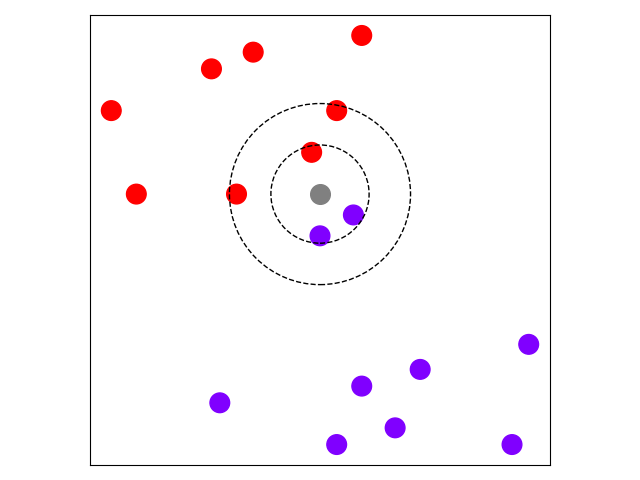

In [69]:
plt.figure()
plt.gca().set_aspect('equal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='rainbow')
plt.scatter([0.0], [0.0], c='gray', s=200)
plt.scatter([0.0], [0.0], s=5000, facecolors='none', edgecolors='black', linestyle='--')
plt.scatter([0.0], [0.0], s=17000, facecolors='none', edgecolors='black', linestyle='--')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show() 

The plot above already makes it obvious the prediction for the class label of the unknown data point would differ depending on $k=3$ or $k=5$. This is, of course, a general observation. It also shows which setting $k$ to an odd number is the common approach as it reduced the number of ties where the labels of k-nearest neighbors are equally split in half.

#### Train the Classifier

Now that we have convinced ourselves visually that $k=3$ and $k=5$ will yield different predictions, we can actually train a KNN classifier for the two values and predict the class label for out unknown data point at `(0, 0)`.

In [59]:
# Create and train classifier with k=3
clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# Predict for grey data point (0, 0)
y_pred = clf.predict([[0.0, 0.0]])

print('Predicted class label: {}'.format(y_pred[0]))

Predicted class label: 0


In [60]:
# Create and train classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)

# Predict for grey data point (0, 0)
y_pred = clf.predict([[0.0, 0.0]])

print('Predicted class label: {}'.format(y_pred[0]))

Predicted class label: 1


Unsurprisingly, the predicted class labels differ depending on the value of $k$. Feel free to try other values of $k$ and see if the results agree with your expectations based on the the plot above

#### Voronoi Tessellation for k=1

As we saw in the lecture, setting $k=1$ results in a [Voronoi Tessellation](https://en.wikipedia.org/wiki/Voronoi_diagram) of the data space. Each region containing a data point $x$ represents the subspace in which all unknown data points will get the same class labels as $x$.

Let's plot this for your toy dataset.

<IPython.core.display.Javascript object>


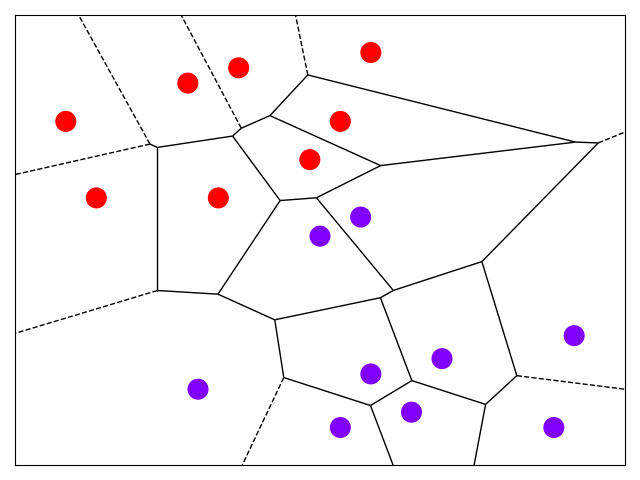

In [62]:
#plt.figure()   # If the plot is empty, try uncommenting this line
vor = Voronoi(X)
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='rainbow')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show()

### KNN for Regression

Let's not look at the example for regression using KNN as shown in the lecture.

In [120]:
data = np.array([
    [2.0, 11.0], [18.0, 9.0], [10.0, 4.0], [2.5, 9], [4, 9], [4.5, 8.5],
    [9.5, 4.5], [8.5, 5], [5.5, 5.5], [4.5, 6.5], [3.8, 6], [7.5, 6.5], [7.7, 7.3],
    [11.5, 6], [12.5, 4.5], [13.5, 4.5], [13, 3.5], [14, 6.2], [14.7, 3.7],
    [14.7, 3.7], [15.2, 6], [16.5, 7]
])

X = data[:,0].reshape(-1, 1)
y = data[:,1]

We can plot the data with some auxiliary visualization to indicate the ranges for different values of $k$. Again, the exact coordinates are not of interest here, but the unknown point for which we want to predict the $y$ value is at $x=9$.

**Note:** The dashed rectangles might be a bit misleading as only the left and right borders are relevant, but not the top and bottom one. The input is only 1-dimensional, so the distances between the data points are only calculated along the $x$ axis

<IPython.core.display.Javascript object>


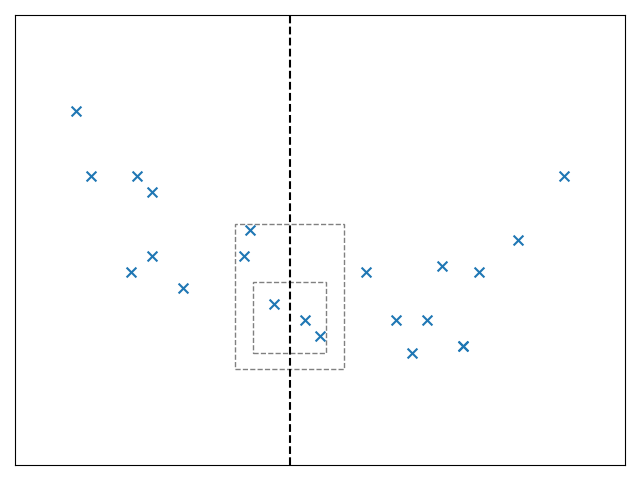

In [122]:
plt.figure()
plt.xlim([0.0, 20.0])
plt.ylim([0.0, 14.0])
plt.scatter(X, y, marker='x', s=50)
plt.gca().add_patch(Rectangle((7.8,3.5), 2.4, 2.2, facecolor='none', edgecolor='gray', linestyle='--'))
plt.gca().add_patch(Rectangle((7.2,3), 3.6, 4.5, facecolor='none', edgecolor='gray', linestyle='--'))
plt.axvline(x=9, c='black', linestyle='--')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show() 

Again, just by looking at the plot it's easy to see that the predicted value for $k=3$ will be lower than for $k=5$ since the $y$ values of the 2 additional points are both larger than the ones for the 3 points for $k=3$. The 2 additional points will there for raise the average.

#### Train the Regressors

Training both regressors for $k=3$ and $k=5$, and then predicting the value for the unknown point $x=9$ confirms our observation.

In [9]:
# Create and train regressor with k=3
regr = KNeighborsRegressor(n_neighbors=3).fit(X, y)

# Predict for grey data point (0, 0)
y_pred_k3 = regr.predict([[9.0]])[0]

print('Predicted class label: {}'.format(y_pred_k3))

Predicted class label: 4.5


In [10]:
# Create and train regressor with k=3
regr = KNeighborsRegressor(n_neighbors=5).fit(X, y)

# Predict for grey data point (0, 0)
y_pred_k5 = regr.predict([[9.0]])[0]

print('Predicted class label: {}'.format(y_pred_k5))

Predicted class label: 5.46


...and we can alo plot the results. The blue dot represents the predicted value for $k=3$, and the red dot represents the predicted valued for $k=5$.

<IPython.core.display.Javascript object>


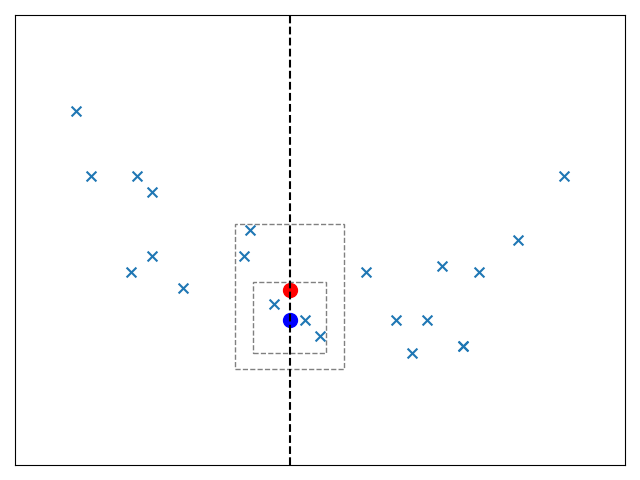

In [123]:
plt.figure()
plt.xlim([0.0, 20.0])
plt.ylim([0.0, 14.0])
plt.scatter(X, y, marker='x', s=50)
plt.gca().add_patch(Rectangle((7.8,3.5), 2.4, 2.2, facecolor='none', edgecolor='gray', linestyle='--'))
plt.gca().add_patch(Rectangle((7.2,3), 3.6, 4.5, facecolor='none', edgecolor='gray', linestyle='--'))
plt.axvline(x=9, c='black', linestyle='--')
plt.scatter([9], [y_pred_k3], s=100, c='blue')
plt.scatter([9], [y_pred_k5], s=100, c='red')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show() 

## KNN Classification of IRIS Dataset

The [IRIS dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a very simple classification data for prediction the type of iris plant given 4 numerical features (all lengths in cm).

### Load Data

In [130]:
df = pd.read_csv('data/iris.csv')

# Convert the species name to numerical categories 0, 1, 2
df['species'] = pd.factorize(df['species'])[0]

# The rows are sorted, so let's shuffle them
df = df.sample(frac=1, random_state=5).reset_index(drop=True)

# Show the first 5 columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.7,3.9,1.2,1
1,6.1,2.6,5.6,1.4,2
2,5.8,2.8,5.1,2.4,2
3,4.4,3.2,1.3,0.2,0
4,7.2,3.6,6.1,2.5,2


### Create Training and Test Data

To allow to visualize things more easily, we consider only to input features (sepal length and sepal width)

In [131]:
# Convert data to numpy arrays
X = df[['sepal_length', 'sepal_width']].to_numpy()
y = df[['species']].to_numpy().squeeze()

# Let's go for a 80%/20% split -- you can change the value anf see its effects
train_test_ratio = 0.80

# Calculate the size of the training data (the size of the dest data is also implicitly given)
train_set_size = int(train_test_ratio * len(X))

# Split data and labels into training and test data with respect to the size of the test data
X_train, X_test = X[:train_set_size], X[train_set_size:]
y_train, y_test = y[:train_set_size], y[train_set_size:]

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))
print(len(X_test), len(y_test))

Size of training set: 120
Size of test: 30
30 30


With 2-dimensional data points, we can plot the data in a straightforward manner

<IPython.core.display.Javascript object>


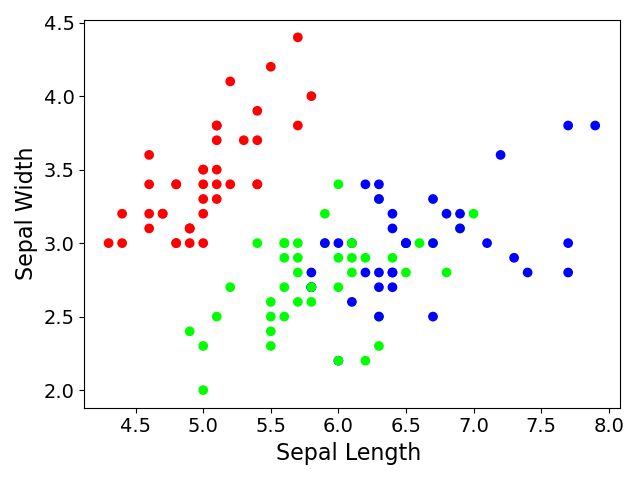

In [127]:
# We re-use the color maps later for visualizing the decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold)
plt.xlabel('Sepal Length ', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.tight_layout()
plt.show()

Just from looking at the plot above we can see, that the "red" class is well separated while the "green" and "blue" classes show quite some overlap. Based on this we can expect that predicting the "red" class correctly will be easier than for the "green" and "blue" class.

**Note:** This overlap between the "green" and "blue" class is only so pronounced because we have ignored 2 features. With respect to all 4 features, all 3 classes are quite separated and most classification models have no problem with that simple dataset.

### Train and Test KNN Classifier

We can set $k=5$ and train a KNN classifier to see how well it predicts the class labels for the test data.

In [128]:
iris_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = iris_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.38      0.43      0.40         7
           2       0.69      0.69      0.69        13

    accuracy                           0.70        30
   macro avg       0.69      0.67      0.68        30
weighted avg       0.72      0.70      0.71        30



Precision, recall and f1-score for Class 0 are very high, which corresponds to the classification of "red" and "non-red" data points. In contrast, for Call 1 and 2 the results are not as good, as the "green" and "blue" data points show quite some overlap.

Of course, these are the results for just one setting of $k$. We can perform the same evaluation for a wide range of $k$ values a see which one yields the best average f1-score; we use `macro` in this case.

In [132]:
x = []
f1_scores_c1 = []
f1_scores_c2 = []
f1_scores_c3 = []
f1_scores_avg = []

for k in range(1, 110):
    x.append(k)
    iris_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = iris_classifier.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    f1_scores_avg.append(report['macro avg']['f1-score'])
    f1_scores_c1.append(report['0']['f1-score'])
    f1_scores_c2.append(report['1']['f1-score'])
    f1_scores_c3.append(report['2']['f1-score'])


...and the corresponding plot:

<IPython.core.display.Javascript object>


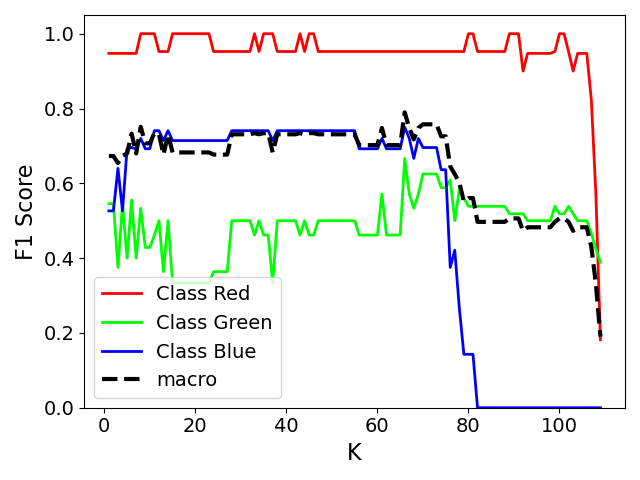

In [133]:
plt.figure()
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('K', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
#plt.plot(x, f1_scores_micro, label='micro')
plt.plot(x, f1_scores_c1, label='Class Red', c='#FF0000', lw=2)
plt.plot(x, f1_scores_c2, label='Class Green', c='#00FF00', lw=2)
plt.plot(x, f1_scores_c3, label='Class Blue', c='#0000FF', lw=2)
plt.plot(x, f1_scores_avg, '--', label='macro', c="black", lw=3)
plt.legend(loc="lower left", prop={'size': 14})
plt.tight_layout()
plt.show()

Again, we see that the "red" class is easier to predict than the two other ones. In this case, the f1-scores (particularly the average over all 3 classes; black dashed line) are rather stable for a wider range of $k$ values. This indicates that the train data points are rather balanced and equally distributed. However, feel free to change the `random_state` in the step `df = df.sample(frac=1, random_state=5).reset_index(drop=True)`, to generate a different split into training and test data.

In general, the results are typically much more sensitive to the value of $k$.

### Plot Decision Boundaries

Plotting the decision boundaries can be done by plotting the regions with respect to the predicted class labels. Without going into much details (as this is purely about visualization), the code below generates a fine grid/mesh of data points and predicts the class label for each data point.

<IPython.core.display.Javascript object>


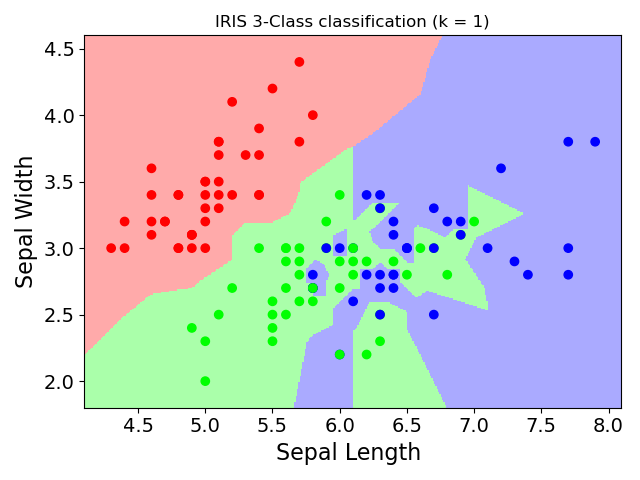

In [138]:
# Defines the "resolution" of the visualization of the decision boundaried
# Smaller values yield bettern-looking boundaries but require more runtime
h = 0.01

# calculate min, max and limits
margin = 0.2
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


X_mesh = np.c_[xx.ravel(), yy.ravel()]

# predict class using data and kNN classifier
k = 1
iris_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
Z = iris_classifier.predict(X_mesh)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("IRIS 3-Class classification (k = %i)" % (k))
plt.xlabel('Sepal Length ', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.tight_layout()
plt.show()

If you have noticed, for example, for $k=1$, there is a green data point at `(6.0, 2.2)` in a blue region (among other such few cases). The reason for this is that not all data points are distinct. In this case, there are 2 data points with the same input `(6.0, 2.2)` but with different class labels. While the blue one "wins" the prediction, the green one "wins" the plotting :).

## KNN Regression of Howell Dataset

The [Howell Dataset](https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv) contains the weight, height, and age for 544 people. We use this dataset for a regression tasks using KNN.

### Load Data

In [139]:
df = pd.read_csv('data/Howell1.csv', sep=';')

# We consider only males to keep it simple
df = df[df['male'] == 1]

# The rows are sorted, so let's shuffle them
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

# Show the first 5 columns
df.head()

,height,weight,age,male
0,157.480,45.869491,41.0,1
1,159.385,50.178615,63.0,1
2,123.190,20.014747,12.0,1
3,168.275,54.600000,41.0,1
4,80.010,9.865626,1.0,1


### 1-d Case: Predict Weight Based on Age

We first consider only 1 input feature (age) to predict the weight of a male. The reason is simply to allow for some visualization that is more tricky for more features.

#### Create Training and Test Data

In [158]:
# Convert data to numpy arrays
X = df[['age']].to_numpy()
y = df[['weight']].to_numpy().squeeze()

# Let's go for a 80%/20% split -- you can change the value anf see its effects
train_test_ratio = 0.8

# Calculate the size of the training data (the size of the dest data is also implicitly given)
train_set_size = int(train_test_ratio * len(X))

# Split data and labels into training and test data with respect to the size of the test data
X_train, X_test = X[:train_set_size], X[train_set_size:]
y_train, y_test = y[:train_set_size], y[train_set_size:]

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))
print(len(X_test), len(y_test))

Size of training set: 205
Size of test: 52
52 52


In case of simple data, it's always good to first have a look at it.

<IPython.core.display.Javascript object>


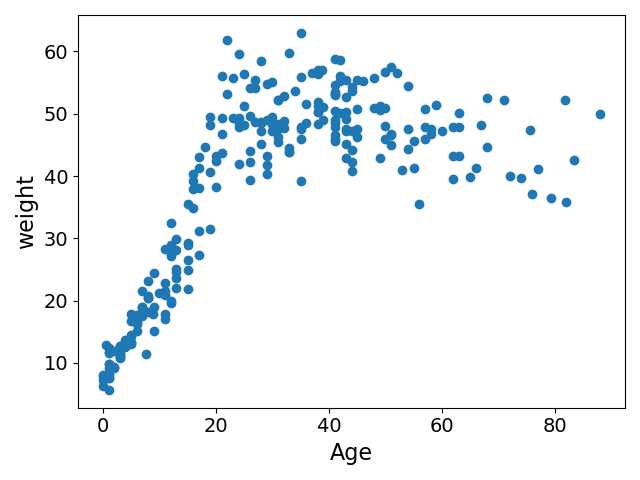

In [159]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('weight', fontsize=16)
plt.scatter(X, y)
plt.tight_layout()
plt.show()

The data looks reasonably intuitive. 

#### Train and Test KNN Regressor

Training and testing a KNN regressor is equally straight forward as the classifier. If course, the evaluation metric is not different. In the following, we use the Root Mean Squared Error (RMSE) for that. You can try different $k$ values and see how the RMSE changes accordingly

In [160]:
howell_regressor = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

y_pred = howell_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=False)

print('The Root Mean Squared Error (RMSE) for k={}: {}'.format(k, mse))

The Root Mean Squared Error (RMSE) for k=16: 4.940125980313687


#### Evaluate Different Values for k

As the predictions on this small dataset are very fast, we can easily evaluate the regressor for a wide range of different $k$ values.

In [161]:
ks, mse = [], []

for k in range(1, 100):
    ks.append(k)
    howell_regressor = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = howell_regressor.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred, squared=False))

<IPython.core.display.Javascript object>


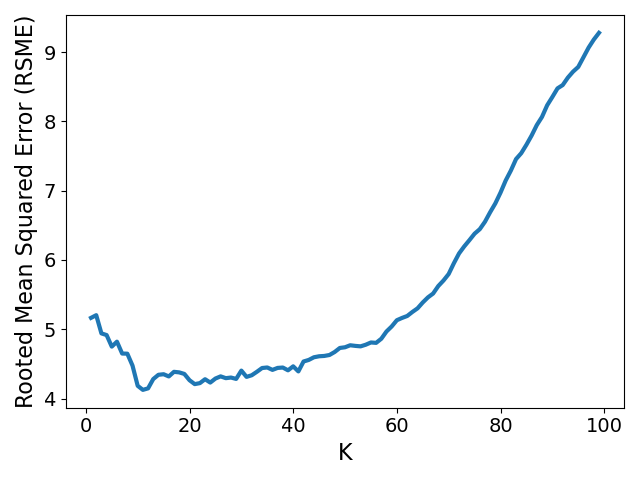

In [162]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('K', fontsize=16)
plt.ylabel('Rooted Mean Squared Error (RSME)', fontsize=16)
plt.plot(ks, mse, lw=3)
plt.tight_layout()
plt.show()

According to the plot above, $k=16$ is the best choice as it yields the lowest RSME.

#### Visualize Regression Line

The following steps visualize the regression line. For this we simple predict the output for many points along the x axis.

In [163]:
k = 16

howell_regressor = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

x_val, y_val = [], []

for h in np.arange(np.min(X), np.max(X), 0.01):
    y_pred = howell_regressor.predict(np.array([[h]]))
    x_val.append(h)
    y_val.append(y_pred[0])

...and plot the result:

<IPython.core.display.Javascript object>


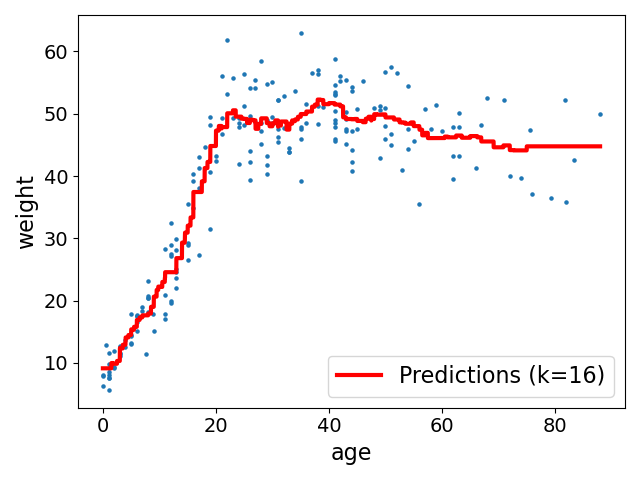

In [164]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('age', fontsize=16)
plt.ylabel('weight', fontsize=16)
plt.scatter(X_train, y_train, s=5)
plt.plot(x_val, y_val, c='red', lw=3, label='Predictions (k={})'.format(k))
plt.legend(loc="lower right",  fontsize=16)
plt.tight_layout()
plt.show()

Again, you can plot the results for different values of $k$ and see how it effects the regression line.

### 2-d Case: Predict Weight Based on Age and Height

We can do the same regression task but now for two input features (Age + Height). The regressor, of course, does not care. The only difference is that we no longer can simple plot the respective regression line.

#### Create Training and Test Data

In [165]:
# Convert data to numpy arrays
X = df[['height', 'age']].to_numpy()
y = df[['weight']].to_numpy().squeeze()

# Let's go for a 80%/20% split -- you can change the value anf see its effects
train_test_ratio = 0.80

# Calculate the size of the training data (the size of the dest data is also implicitly given)
train_set_size = int(train_test_ratio * len(X))

# Split data and labels into training and test data with respect to the size of the test data
X_train, X_test = X[:train_set_size], X[train_set_size:]
y_train, y_test = y[:train_set_size], y[train_set_size:]

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))
print(len(X_test), len(y_test))

Size of training set: 205
Size of test: 52
52 52


When using `%notebook` you can conveniently rotate 3d plots by dragging to plot using the mouse.

<IPython.core.display.Javascript object>


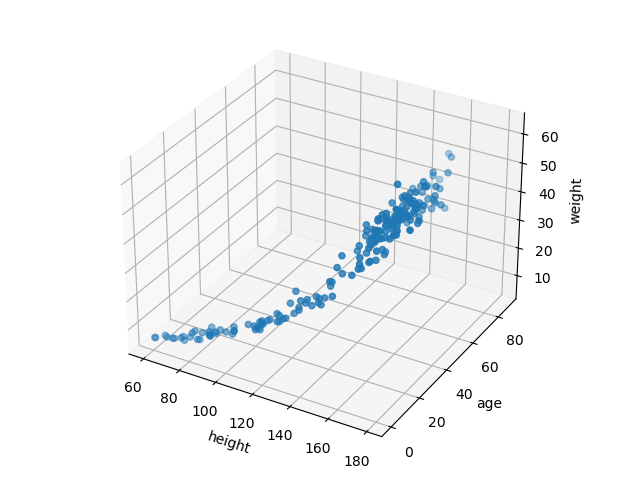

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('height')
ax.set_ylabel('age')
ax.set_zlabel('weight')
ax.scatter(X_train[:,0], X_train[:,1], y_train)
plt.tight_layout()
plt.show() 

#### Train KNN Regressor

First, we can train a KNN regressor for different $k$ values and check the resulting RSME.

In [167]:
howell_regressor = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

y_pred = howell_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared=False)

print('The Root Mean Squared Error (RMSE) for k={}: {}'.format(k, mse))

The Root Mean Squared Error (RMSE) for k=16: 3.5232914993439435


#### Evaluate Different Values for k

As for the 1-d case, we can evaluate the KNN regressors for different $k$ values and plot the RSME.

In [168]:
ks = []
mse = []

for k in range (1, 100):
    ks.append(k)
    howell_regressor = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    y_pred = howell_regressor.predict(X_test)

    mse.append(mean_squared_error(y_test, y_pred, squared=False))

<IPython.core.display.Javascript object>


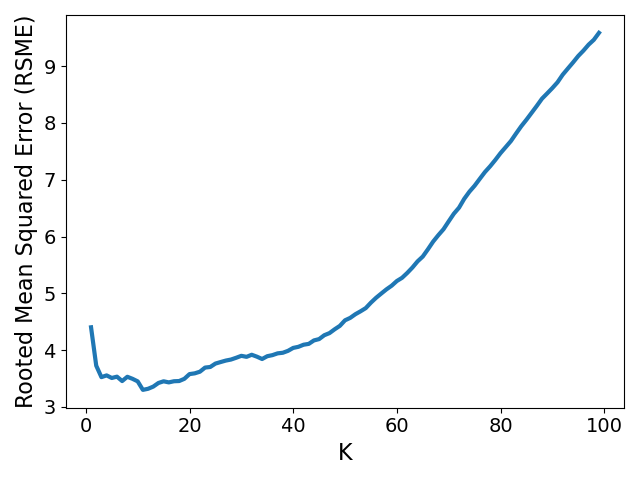

In [169]:
plt.figure()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('K', fontsize=16)
plt.ylabel('Rooted Mean Squared Error (RSME)', fontsize=16)
plt.plot(ks, mse, lw=3)
plt.tight_layout()
plt.show()

The lowest RSME is again for $k=16$, but overall the RSME has gone down a bit compared to the 1-d case. Of course, this shouldn't be surprising as we use additional input features which generally allows to make better predictions.

### Effects of Normalization/Standardization

As the last part of this notebook, let's look at the effect of normalization/standardization of the data on the classification results. Note the also effects the regression results, but the differences are more intuitive in case of classifications.

We use the IRIS dataset again.

#### Load Data

In [170]:
df_raw = pd.read_csv('data/iris.csv')

# Convert the species name to numerical categories 0, 1, 2
df_raw['species'] = pd.factorize(df_raw['species'])[0]

# The rows are sorted, so let's shuffle them
df_raw = df_raw.sample(frac=1, random_state=5).reset_index(drop=True)

# Show the first 5 columns
df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.7,3.9,1.2,1
1,6.1,2.6,5.6,1.4,2
2,5.8,2.8,5.1,2.4,2
3,4.4,3.2,1.3,0.2,0
4,7.2,3.6,6.1,2.5,2


The original dataset is good as it is: all 4 features are lengths measured in $cm$ and the are of similar magnitude. So let's create a modified dataset where we assume that both `petal_length` and `petal_width` have been measured in $m$.

In [171]:
# Create a copy of original daya
df_mod = df_raw.copy()

# Conver cm to m for petal length and petal width
df_mod['petal_length'] = df_mod['petal_length'] / 100
df_mod['petal_width'] = df_mod['petal_width'] / 100

df_mod.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.7,0.039,0.012,1
1,6.1,2.6,0.056,0.014,2
2,5.8,2.8,0.051,0.024,2
3,4.4,3.2,0.013,0.002,0
4,7.2,3.6,0.061,0.025,2


#### Create Training and Test Data

In [172]:
# Convert data to numpy arrays
X_raw = df_raw[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
X_mod = df_mod[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
# The class labels is of course still the same for both datasets
y = df_mod[['species']].to_numpy().squeeze()


## OPTIONAL:
## The classification task over the original IRIS dataset is too easy, most classifiers perform perfectly
## We therefore add noise in terms of additional 20 features with random values
#random_state = np.random.RandomState(0)
#n_samples, n_features = X_raw.shape
#R = random_state.randn(n_samples, 20 * n_features)
#X_raw = np.concatenate((X_raw, R), axis=1)
#X_mod = np.concatenate((X_mod, R), axis=1)

# Let's go for a 80%/20% split -- you can change the value anf see its effects
train_test_ratio = 0.80

# Calculate the size of the training data (the size of the dest data is also implicitly given)
train_set_size = int(train_test_ratio * len(X_raw))

# Split data and labels into training and test data with respect to the size of the test data
X_raw_train, X_raw_test = X_raw[:train_set_size], X_raw[train_set_size:]
X_mod_train, X_mod_test = X_mod[:train_set_size], X_mod[train_set_size:]
y_train, y_test = y[:train_set_size], y[train_set_size:]

print("Size of training set: {}".format(len(X_raw_train)))
print("Size of test: {}".format(len(X_raw_test)))

Size of training set: 120
Size of test: 30


#### Train and Test KNN Classifiers

We can now train and test two KNN classifiers, one for the original and one for the modified datasets. Try different $k$ values and check the differences. Overall, the classifier trained over the original dataset will yield better f1-scores.

In [176]:
k = 17

knn_raw = KNeighborsClassifier(n_neighbors=k).fit(X_raw_train, y_train)
knn_mod = KNeighborsClassifier(n_neighbors=k).fit(X_mod_train, y_train)

y_raw_pred = knn_raw.predict(X_raw_test)
y_mod_pred = knn_mod.predict(X_mod_test)

f1_raw = f1_score(y_test, y_raw_pred, average='macro')
f1_mod = f1_score(y_test, y_mod_pred, average='macro')

print(f1_raw, f1_mod)

0.9644444444444445 0.6825396825396824


In a more systematic fashion we compare the f1-scores of both classifiers for different values of $k$ and plot the results.

In [177]:
ks, f1_raw, f1_mod = [], [], []

for k in range(1, 120):
    ks.append(k)
    
    knn_raw = KNeighborsClassifier(n_neighbors=k).fit(X_raw_train, y_train)
    knn_mod = KNeighborsClassifier(n_neighbors=k).fit(X_mod_train, y_train)

    y_raw_pred = knn_raw.predict(X_raw_test)
    y_mod_pred = knn_mod.predict(X_mod_test)

    f1_raw.append(f1_score(y_test, y_raw_pred, average='macro'))
    f1_mod.append(f1_score(y_test, y_mod_pred, average='macro'))

<IPython.core.display.Javascript object>


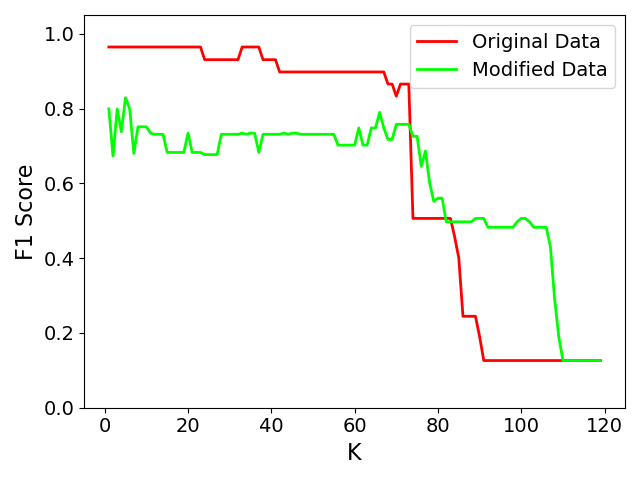

In [178]:
plt.figure()
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('K', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
#plt.plot(x, f1_scores_micro, label='micro')
plt.plot(ks, f1_raw, label='Original Data', c='#FF0000', lw=2)
plt.plot(ks, f1_mod, label='Modified Data', c='#00FF00', lw=2)
plt.legend(loc="upper right", prop={'size': 14})
plt.tight_layout()
plt.show()

For any meaningful values of $k$, the classifier trained over the original dataset performs better.

#### Scale Modified Data

We now assume that the modified data is the only dataset we have. We would see that the input features are of (very) different magnitude. In this case, it typically a good approach to normalize or standardize the input features.

In the following, we use out-of-the-box methods for standardization.

In [44]:
scaler = preprocessing.StandardScaler().fit(X_mod_train)

X_scaled_train = scaler.transform(X_mod_train)
X_scaled_test = scaler.transform(X_mod_test)

Now we perform the same test, but here comparing a classifier trained over the original data (which we know is in good shape) to a classifier trained over the scaled data.

In [180]:
ks, f1_raw, f1_scaled = [], [], []

for k in range(1, 120):
    ks.append(k)
    
    knn_raw = KNeighborsClassifier(n_neighbors=k).fit(X_raw_train, y_train)
    knn_scaled = KNeighborsClassifier(n_neighbors=k).fit(X_scaled_train, y_train)

    y_raw_pred = knn_raw.predict(X_raw_test)
    y_scaled_pred = knn_scaled.predict(X_scaled_test)

    f1_raw.append(f1_score(y_test, y_raw_pred, average='macro'))
    f1_scaled.append(f1_score(y_test, y_scaled_pred, average='macro'))

...and plotting the results:

<IPython.core.display.Javascript object>


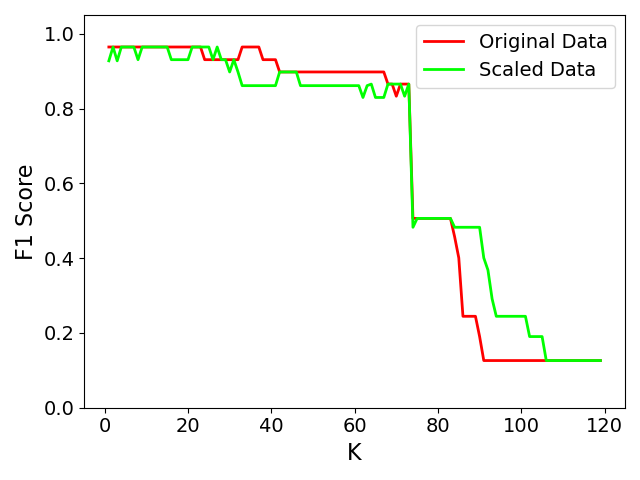

In [46]:
plt.figure()
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('K', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
#plt.plot(x, f1_scores_micro, label='micro')
plt.plot(ks, f1_raw, label='Original Data', c='#FF0000', lw=2)
plt.plot(ks, f1_scaled, label='Scaled Data', c='#00FF00', lw=2)
plt.legend(loc="upper right", prop={'size': 14})
plt.tight_layout()
plt.show()

As you can see, the result are now very comparable, confirming the benefits of standardization in this use case.

## Summary

K-Nearest Neighbor (KNN) as a classification and regression model is arguably a very intuitive ans simple. It's also very generic as it requires only a well-defined notion of similarity/distance between data points. Despite it's simplicity, it often still achieves good results in practice.

The main problem is its limited applicability for (very) large dataset as the prediction of the class labels or the output values are computationally expensive. While special data structures to speed up the identification of the k-nearest neighbors exits, it's still of higher complexity than compared to, say, Linear Models (see later lectures).

Similar to clustering, KNN relies on the explicit notion of similarity/distance between data points. As such, KNN-based classification and regression is affected by the scale and range of the different features of a dataset. Therefore, the consideration of normalization/standardization becomes crucial to ensure meaningful results.